Bibliotecas usadas no projeto e respectivas versões
Ao longo do projeto iremos utilizar algumas bibliotecas que possuem as ferramentas necessárias para analisar, criar visualizações e criar modelos a partir dos dados. As versões específicas das bibliotecas utilizadas neste projeto são as seguintes:

- Pandas 1.5.3
- Matplotlib 3.9.0
- Plotly 5.22.0
- Statsmodels 0.14.11

# Análise de séries temporais

## Entendendo o problema

Uma rede de restaurantes está com dificuldades em realizar o planejamento do negócio como um todo. A percepção é de que em alguns dias o movimento é muito baixo, fazendo com que os garçons fiquem muito ociosos. Em outros dias, o movimento é muito alto, e a quantidade de garçons parece ser insuficiente para atender a todas as pessoas.

Vamos realizar uma análise nos dados de **quantidade de clientes por dia nos restaurantes** para melhorar o planejamento de atendimento na rede de restaurantes.

### Fazendo a leitura dos dados

O primeiro passo é fazer a leitura da base de dados, a partir do arquivo `qtd_clientes_restaurantes.csv`. Vamos fazer a leitura com a função [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) da biblioteca `pandas`.

In [ ]:
# !locale -a
# !sudo apt-get install language-pack-pt-base

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# from google.colab import drive

# drive.mount('.\content\drive')

link = '/content/clientes_restaurantes.csv'
link2 = '/content/datas_comemorativas.csv'

dados = pd.read_csv(link)

In [ ]:
dados.head()

,data,Chimi & Churri,Assa Frão
0,1/1/2016,65.0,139.0
1,1/2/2016,24.0,85.0
2,1/3/2016,24.0,81.0
3,1/4/2016,23.0,32.0
4,1/5/2016,2.0,43.0


O `DataFrame` apresenta informações de data e quantidade de clientes de dois restaurantes ao longo dos dias, o **Chimi & Churri** e o **Assa Frão**. Precisamos fazer uma análise desses dados de restaurante para aprimorar o planejamento da quantidade de garçons que precisam ser alocados em cada dia.

Vamos ver algumas informações adicionais dos dados, como presença de dados nulos e tipos de dados em cada coluna, usando o método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html).

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   data            478 non-null    object 
 1   Chimi & Churri  476 non-null    float64
 2   Assa Frão       477 non-null    float64
dtypes: float64(2), object(1)
memory usage: 11.3+ KB


A coluna `data` é do tipo `object`, portanto está sendo entendida como um texto. Vamos aplicar uma transformação da coluna para o formato `datetime` e definir essa informação como o índice do `DataFrame`.

In [ ]:
# tranformando em tipo data e depois passando para index
dados['data'] = pd.to_datetime(dados['data'])
dados.set_index('data', inplace = True)

A base de dados já está carregada e já possui os dados de data como sendo o índice do `DataFrame`.

In [ ]:
dados.head()

,Chimi & Churri,Assa Frão
data,,
2016-01-01,65.0,139.0
2016-01-02,24.0,85.0
2016-01-03,24.0,81.0
2016-01-04,23.0,32.0
2016-01-05,2.0,43.0


In [ ]:
# Encontrando dados nulos

dados['Chimi & Churri'][dados['Chimi & Churri'].isna()]

,Chimi & Churri
data,
2016-04-05,NaN
2016-09-17,NaN


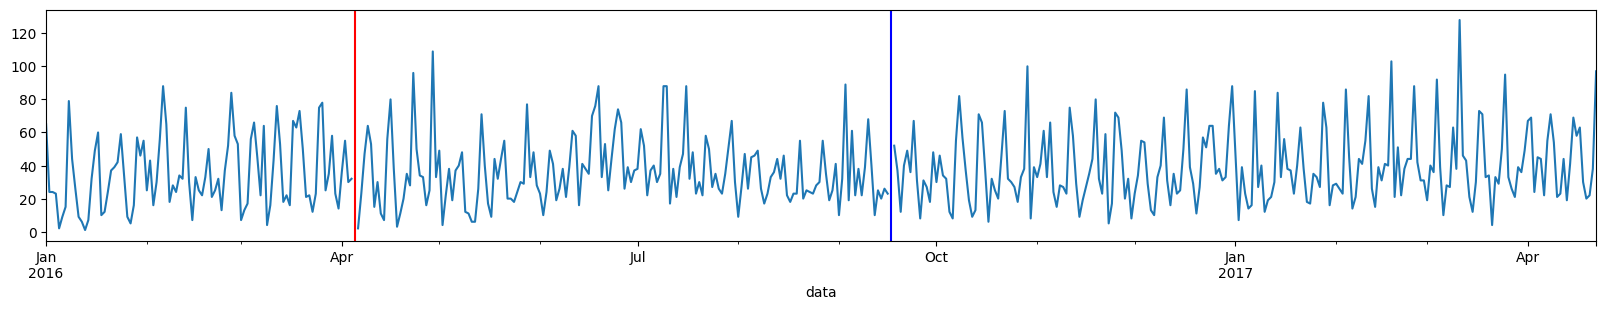

In [ ]:
dados['Chimi & Churri'].plot(figsize = (20,3))
plt.axvline(x = dados['Chimi & Churri'][dados['Chimi & Churri'].isna()].index[0], color = 'red')
plt.axvline(x = dados['Chimi & Churri'][dados['Chimi & Churri'].isna()].index[1], color = 'blue');

In [ ]:
dados['Assa Frão'][dados['Assa Frão'].isna()]

,Assa Frão
data,
2016-11-24,NaN


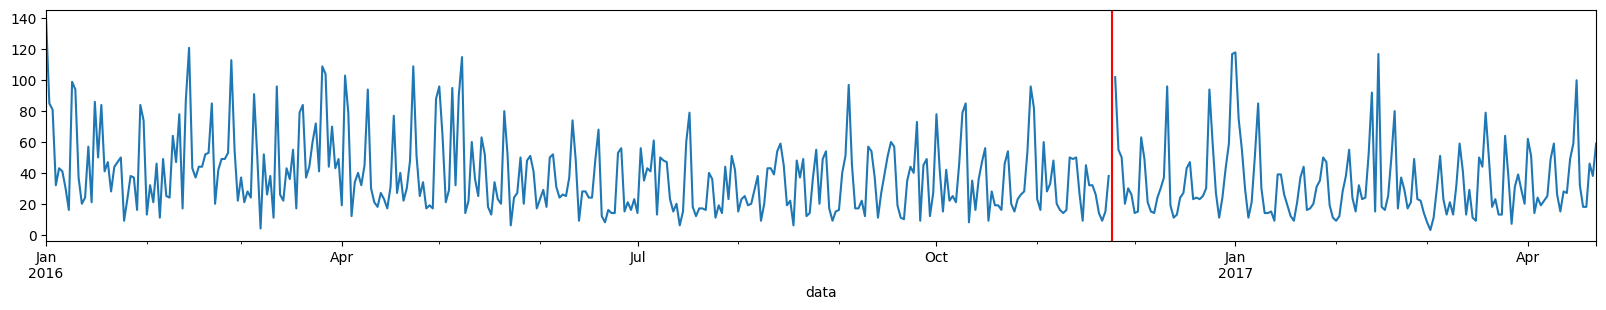

In [ ]:
dados['Assa Frão'].plot(figsize = (20,3))
plt.axvline(x = dados['Assa Frão'][dados['Assa Frão'].isna()].index[0], color = 'red')


#interpolação
- Preencher com o valor anterior
- Preencher com o valor posterior
- Preencher com o ponto médio do valor anterior e posterior

In [ ]:
dados.loc['2016-04-04':'2016-04-06']

,Chimi & Churri,Assa Frão
data,,
2016-04-04,32.0,12.0
2016-04-05,NaN,34.0
2016-04-06,2.0,40.0


In [ ]:
dados = dados.interpolate()

In [ ]:
dados.loc['2016-04-04':'2016-04-06']

,Chimi & Churri,Assa Frão
data,,
2016-04-04,32.0,12.0
2016-04-05,17.0,34.0
2016-04-06,2.0,40.0


In [ ]:
# 2016-04-05	NaN
# 2016-09-17	NaN
# 2016-11-24	NaN

# Explorando os dados

In [ ]:
dados = dados.astype(int)
dados

,Chimi & Churri,Assa Frão
data,,
2016-01-01,65,139
2016-01-02,24,85
2016-01-03,24,81
2016-01-04,23,32
2016-01-05,2,43
...,...,...
2017-04-18,30,18
2017-04-19,20,18
2017-04-20,22,46


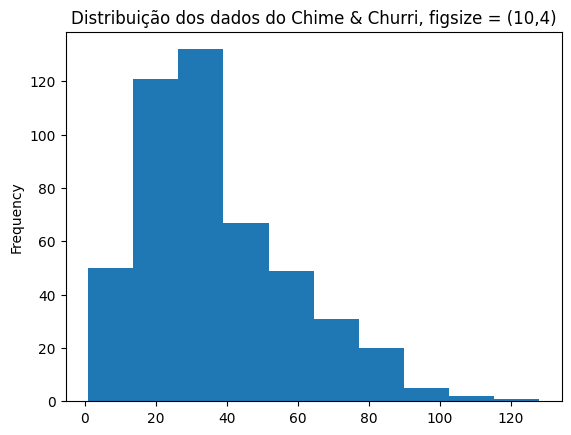

In [ ]:
dados['Chimi & Churri'].plot(kind = 'hist', title = 'Distribuição dos dados do Chime & Churri, figsize = (10,4)');

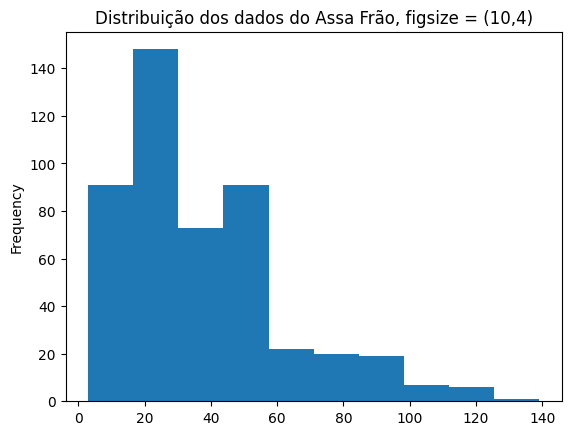

In [ ]:
dados['Assa Frão'].plot(kind = 'hist', title = 'Distribuição dos dados do Assa Frão, figsize = (10,4)');

In [ ]:
dados.describe()

,Chimi & Churri,Assa Frão
count,478.000000,478.000000
mean,37.451883,37.679916
std,21.433061,24.619708
min,1.000000,3.000000
25%,22.250000,19.000000
50%,33.000000,30.500000
75%,49.000000,50.000000
max,128.000000,139.000000


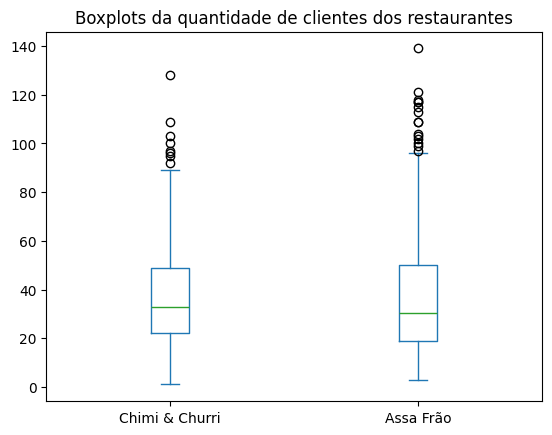

In [ ]:
dados.plot(kind = 'box', title = 'Boxplots da quantidade de clientes dos restaurantes');

# Extraindo insights

Contabilizando o total de clientes

In [ ]:
dados.sum(axis = 1)

,0
data,
2016-01-01,204
2016-01-02,109
2016-01-03,105
2016-01-04,55
2016-01-05,45
...,...
2017-04-18,48
2017-04-19,38
2017-04-20,68


In [ ]:
dados['Total'] = dados.sum(axis = 1)

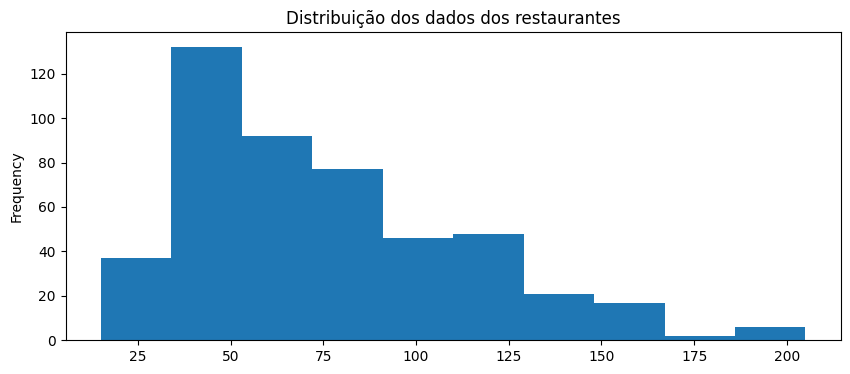

In [ ]:
dados['Total'].plot(kind = 'hist', title = 'Distribuição dos dados dos restaurantes',figsize = (10,4));

In [ ]:
dados.describe()

,Chimi & Churri,Assa Frão,Total
count,478.000000,478.000000,478.000000
mean,37.451883,37.679916,75.131799
std,21.433061,24.619708,37.512896
min,1.000000,3.000000,15.000000
25%,22.250000,19.000000,45.000000
50%,33.000000,30.500000,66.500000
75%,49.000000,50.000000,99.000000
max,128.000000,139.000000,205.000000


In [ ]:
from matplotlib import dates

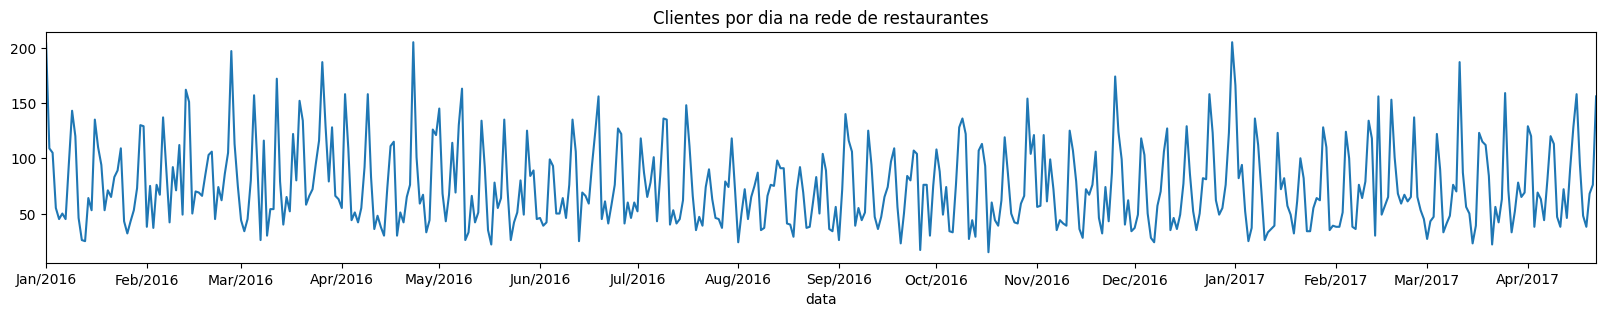

In [ ]:

ax = dados['Total'].plot(figsize = (20,3), title = 'Clientes por dia na rede de restaurantes')
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%b/%Y'));

# Encontrando a quantidade de clientes mensais

In [ ]:
clientes_mensais = dados.resample(rule = 'M')[['Chimi & Churri', 'Assa Frão']].sum()
clientes_mensais

<ipython-input-30-632d20458035>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  clientes_mensais = dados.resample(rule = 'M')[['Chimi & Churri', 'Assa Frão']].sum()


,Chimi & Churri,Assa Frão
data,,
2016-01-31,920,1577
2016-02-29,1109,1396
2016-03-31,1177,1513
2016-04-30,1089,1229
2016-05-31,957,1338
2016-06-30,1262,914
2016-07-31,1299,986
2016-08-31,972,944
2016-09-30,1037,1084


In [ ]:
# clientes_mensais.index.month_name(locale = 'pt_BR.utf8')

In [ ]:
# !locale -a

In [ ]:
# !sudo apt-get install language-pack-pt-base

In [ ]:
clientes_mensais['Mês'] = clientes_mensais.index.month_name(locale = 'pt_BR.utf8')
clientes_mensais

,Chimi & Churri,Assa Frão,Mês
data,,,
2016-01-31,920,1577,Janeiro
2016-02-29,1109,1396,Fevereiro
2016-03-31,1177,1513,Março
2016-04-30,1089,1229,Abril
2016-05-31,957,1338,Maio
2016-06-30,1262,914,Junho
2016-07-31,1299,986,Julho
2016-08-31,972,944,Agosto
2016-09-30,1037,1084,Setembro


Cores para o gráfico
- Azul: #636EFA
- Vermelho: #EF553B

In [ ]:
import matplotlib.ticker as ticker

<ipython-input-36-9b6c8de4acd0>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_minor_formatter(ticker.FixedFormatter(['\n\n2016','\n\n2017']));


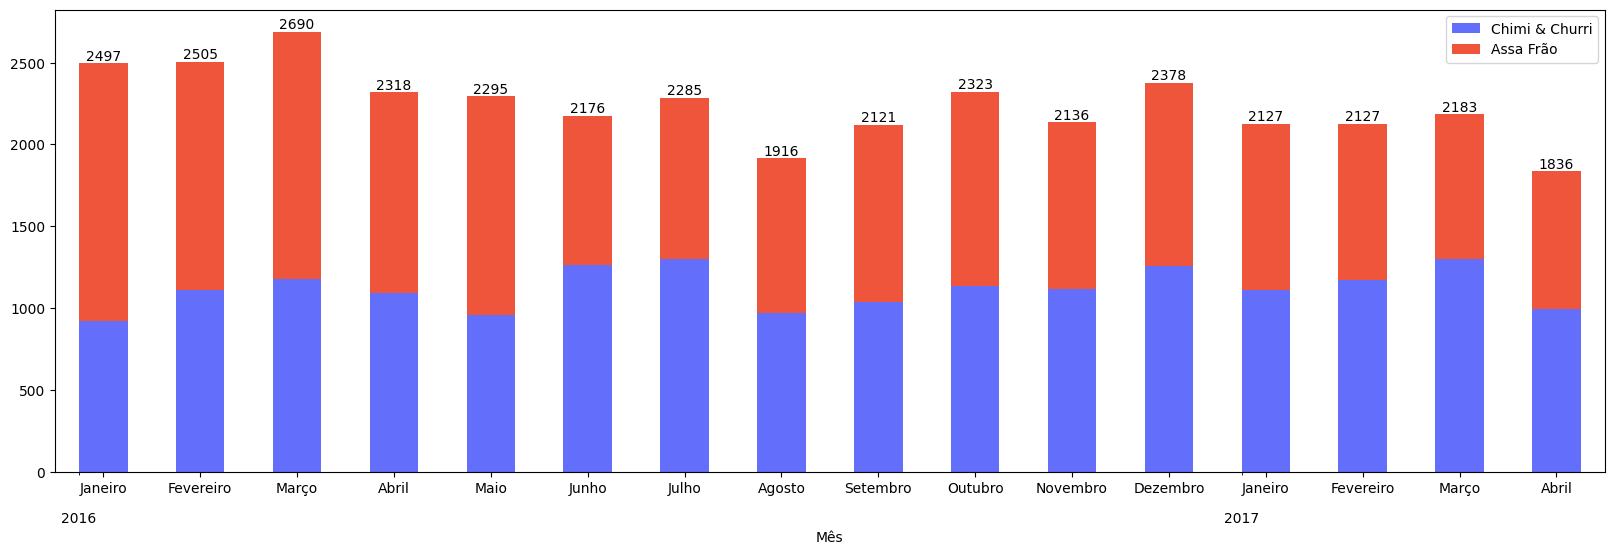

In [ ]:
ax = clientes_mensais.plot(x = 'Mês', kind = 'bar', stacked = True, color = ['#636EFA','#EF553B'],rot = 0, figsize = (20,6))
ax.bar_label(ax.containers[1],fontsize = 10)
ax.xaxis.set_minor_locator(ticker.IndexLocator(12,0))
ax.xaxis.set_minor_formatter(ticker.FixedFormatter(['\n\n2016','\n\n2017']));

# Extrando a média móvel

Calculando a média a cada 7 dias ou seja por semana.

In [ ]:
for restaurante in ['Chimi & Churri', 'Assa Frão']:
  dados[f'{restaurante}_MM7'] = dados[[restaurante]].rolling(7).mean()

In [ ]:
dados

,Chimi & Churri,Assa Frão,Total,Chimi & Churri_MM7,Assa Frão_MM7
data,,,,,
2016-01-01,65,139,204,NaN,NaN
2016-01-02,24,85,109,NaN,NaN
2016-01-03,24,81,105,NaN,NaN
2016-01-04,23,32,55,NaN,NaN
2016-01-05,2,43,45,NaN,NaN
...,...,...,...,...,...
2017-04-18,30,18,48,46.285714,44.714286
2017-04-19,20,18,38,42.857143,43.285714
2017-04-20,22,46,68,43.285714,46.000000


In [ ]:
import plotly.express as px


In [ ]:
px.line(dados,
        x = dados.index,
        y = ['Chimi & Churri_MM7','Assa Frão_MM7'],
        width = 1150,
        height = 400,
        title = 'Média móvel de 7 dias da quantidade de clientes na rede de restaurantes'
        )

# Analisando a média móvel como tendência


<Axes: xlabel='data'>

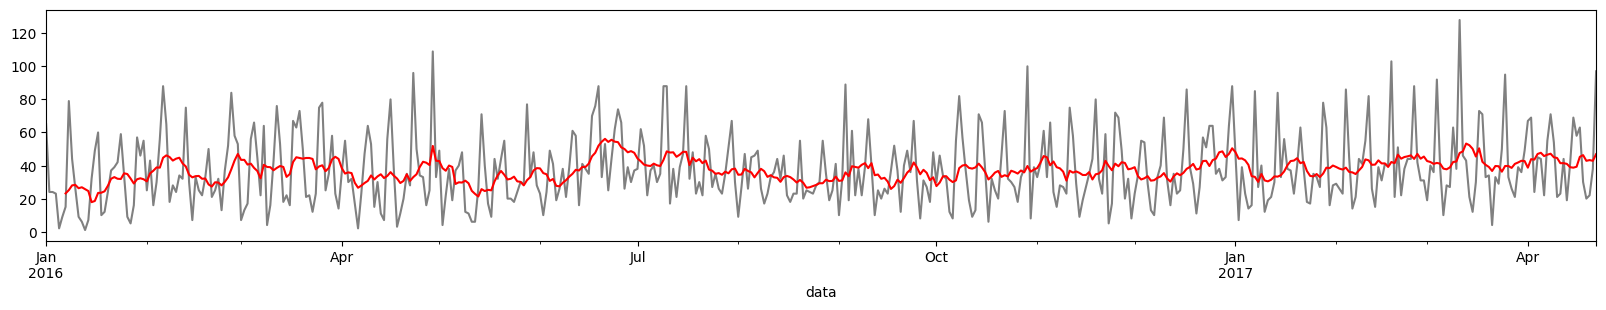

In [ ]:
dados['Chimi & Churri'].plot(color = 'gray', figsize = (20,3))
dados['Chimi & Churri_MM7'].plot(color = 'red', figsize = (20,3))

<Axes: xlabel='data'>

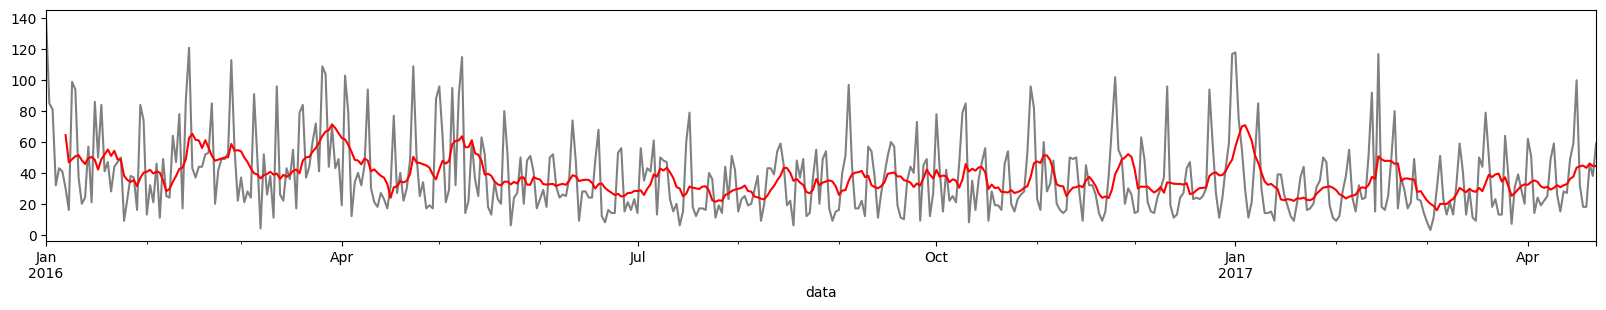

In [ ]:
dados['Assa Frão'].plot(color = 'gray', figsize = (20,3))
dados['Assa Frão_MM7'].plot(color = 'red', figsize = (20,3))

# **Detecção de Anomalias**

Encontrando dia da semana e datas comemorativas

In [ ]:
dados.index.day_name(locale ='pt_BR.utf8')

Index(['Sexta', 'Sábado', 'Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta',
       'Sexta', 'Sábado', 'Domingo',
       ...
       'Quinta', 'Sexta', 'Sábado', 'Domingo', 'Segunda', 'Terça', 'Quarta',
       'Quinta', 'Sexta', 'Sábado'],
      dtype='object', name='data', length=478)

In [ ]:
dados['Dia da semana'] = dados.index.day_name(locale ='pt_BR.utf8')


In [ ]:
datas_comemorativas = pd.read_csv(link2)
datas_comemorativas

,data,feriado
0,1/1/2016,Ano novo
1,2/14/2016,Dia dos namorados
2,3/25/2016,Sexta-feira santa
3,3/27/2016,Pascoa
4,3/28/2016,Domingo de pascoa
5,5/8/2016,Dia das maes
6,6/19/2016,Dia dos pais
7,10/31/2016,Halloween
8,11/25/2016,Black Friday
9,12/24/2016,Vespera de Natal


In [ ]:
datas_comemorativas['data'] = pd.to_datetime(datas_comemorativas['data']) # tranformando data no tipo de data
datas_comemorativas = datas_comemorativas.set_index('data',drop = True) # tranferindo para index
datas_comemorativas

,feriado
data,
2016-01-01,Ano novo
2016-02-14,Dia dos namorados
2016-03-25,Sexta-feira santa
2016-03-27,Pascoa
2016-03-28,Domingo de pascoa
2016-05-08,Dia das maes
2016-06-19,Dia dos pais
2016-10-31,Halloween
2016-11-25,Black Friday


In [ ]:
# unir dois conjunto de dados
dados = pd.merge(dados, datas_comemorativas, how = 'left', left_index = True, right_index = True) # usando o index de dados e o index de datas_comemorativas para conectar.
dados

,Chimi & Churri,Assa Frão,Total,Chimi & Churri_MM7,Assa Frão_MM7,Dia da semana,feriado
data,,,,,,,
2016-01-01,65,139,204,NaN,NaN,Sexta,Ano novo
2016-01-02,24,85,109,NaN,NaN,Sábado,NaN
2016-01-03,24,81,105,NaN,NaN,Domingo,NaN
2016-01-04,23,32,55,NaN,NaN,Segunda,NaN
2016-01-05,2,43,45,NaN,NaN,Terça,NaN
...,...,...,...,...,...,...,...
2017-04-18,30,18,48,46.285714,44.714286,Terça,NaN
2017-04-19,20,18,38,42.857143,43.285714,Quarta,NaN
2017-04-20,22,46,68,43.285714,46.000000,Quinta,NaN


# Capturando dados discrepantes

Os dados discrepantes serão identificados com base no desvio-padrão dos dados. Caso um valor se afaste muito em relação á média geral dos dados, ele será considerado um valor discrepante.

In [ ]:
from scipy.stats import zscore

Z-score (Escore-Z): É uma medida padronizada que indica quantos desvios padrão um ponto de dados está acima ou abaixo da média. A fórmula do z-score é:
z = (x - μ) / σ
Onde:

x é o valor individual\
μ (mi) é a média da população\
σ (sigma) é o desvio padrão

In [ ]:
def detectar_anomalias(coluna):
  dados['zscore'] = zscore(dados[coluna])
  anomalias = dados[(dados['zscore']>3) | (dados['zscore'] < -3)]
  return anomalias[[coluna,'zscore', 'Dia da semana', 'feriado']]

In [ ]:
anomalias_chimi_churri = detectar_anomalias('Chimi & Churri')
anomalias_assa_frao = detectar_anomalias('Assa Frão')

In [ ]:
anomalias_chimi_churri

,Chimi & Churri,zscore,Dia da semana,feriado
data,,,,
2016-04-29,109,3.341710,Sexta,NaN
2017-02-18,103,3.061475,Sábado,NaN
2017-03-11,128,4.229120,Sábado,NaN


In [ ]:
anomalias_assa_frao

,Assa Frão,zscore,Dia da semana,feriado
data,,,,
2016-01-01,139,4.119717,Sexta,Ano novo
2016-02-14,121,3.387830,Domingo,Dia dos namorados
2016-02-27,113,3.062546,Sábado,NaN
2016-05-08,115,3.143867,Domingo,Dia das maes
2016-12-31,117,3.225188,Sábado,Vespera de ano novo
2017-01-01,118,3.265848,Domingo,Ano novo
2017-02-14,117,3.225188,Terça,Dia dos namorados


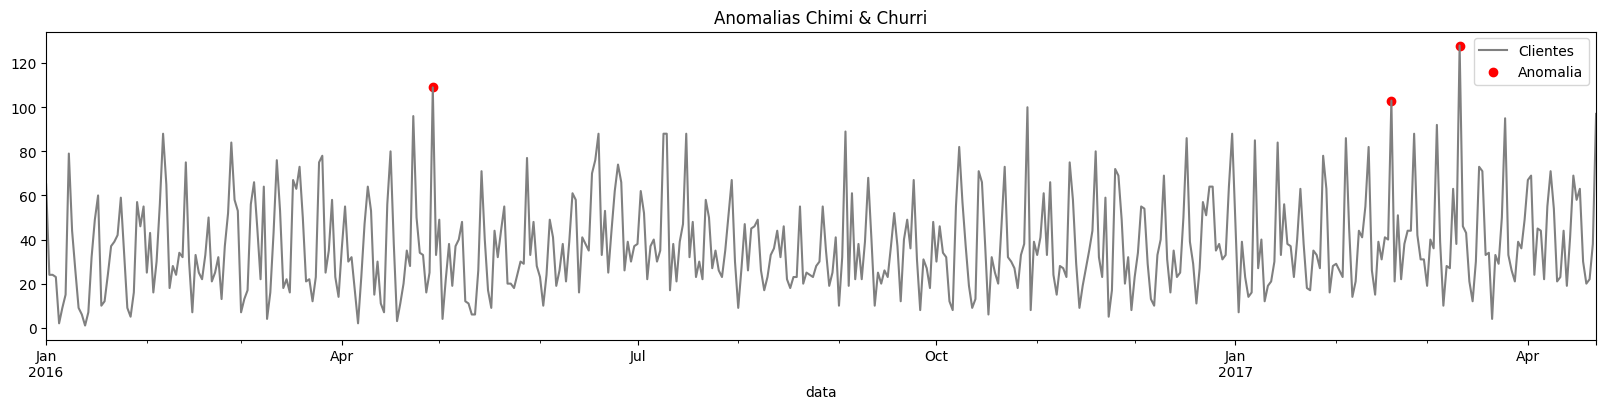

In [ ]:
ax = dados['Chimi & Churri'].plot(label  = 'Clientes', color = 'gray', figsize = (20,4))
ax.scatter(anomalias_chimi_churri.index.to_pydatetime(), anomalias_chimi_churri['Chimi & Churri'], color = 'red', label = 'Anomalia')
ax.set_title('Anomalias Chimi & Churri')
ax.legend();

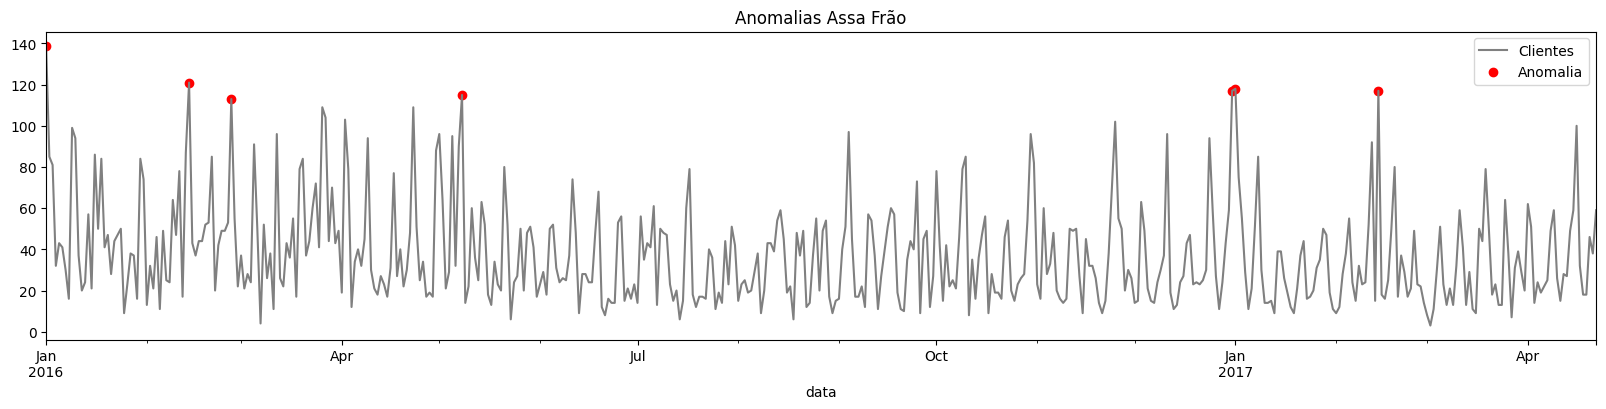

In [ ]:
ax = dados['Assa Frão'].plot(label  = 'Clientes', color = 'gray', figsize = (20,4))
ax.scatter(anomalias_assa_frao.index.to_pydatetime(), anomalias_assa_frao['Assa Frão'], color = 'red', label = 'Anomalia')
ax.set_title('Anomalias Assa Frão')
ax.legend();

In [ ]:

# fig, ax = plt.subplots(figsize=(20,4))
# ax.plot(dados['Chimi & Churri'],color = 'gray')
# ax.scatter(anomalias_chimi_churri.index.to_pydatetime(), anomalias_chimi_churri['Chimi & Churri'], color = 'red', label = 'Anomalia')
# ax.set_title('Anomalias Chimi & Churri')
# ax.legend();

# Descobrindo as datas dos dados discrepantes

In [ ]:
print('Anomalias para o Chimi & Churri')
display(anomalias_chimi_churri)
print('\n\n')
print('Anomalias para o Assa Frão')
display(anomalias_assa_frao)

Anomalias para o Chimi & Churri


,Chimi & Churri,zscore,Dia da semana,feriado
data,,,,
2016-04-29,109,3.341710,Sexta,NaN
2017-02-18,103,3.061475,Sábado,NaN
2017-03-11,128,4.229120,Sábado,NaN





Anomalias para o Assa Frão


,Assa Frão,zscore,Dia da semana,feriado
data,,,,
2016-01-01,139,4.119717,Sexta,Ano novo
2016-02-14,121,3.387830,Domingo,Dia dos namorados
2016-02-27,113,3.062546,Sábado,NaN
2016-05-08,115,3.143867,Domingo,Dia das maes
2016-12-31,117,3.225188,Sábado,Vespera de ano novo
2017-01-01,118,3.265848,Domingo,Ano novo
2017-02-14,117,3.225188,Terça,Dia dos namorados


# Visualizando a autocorrelação

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import matplotlib.pyplot as plt

Text(0.5, 0.98, 'Autocorrelação Chimi & Churri')

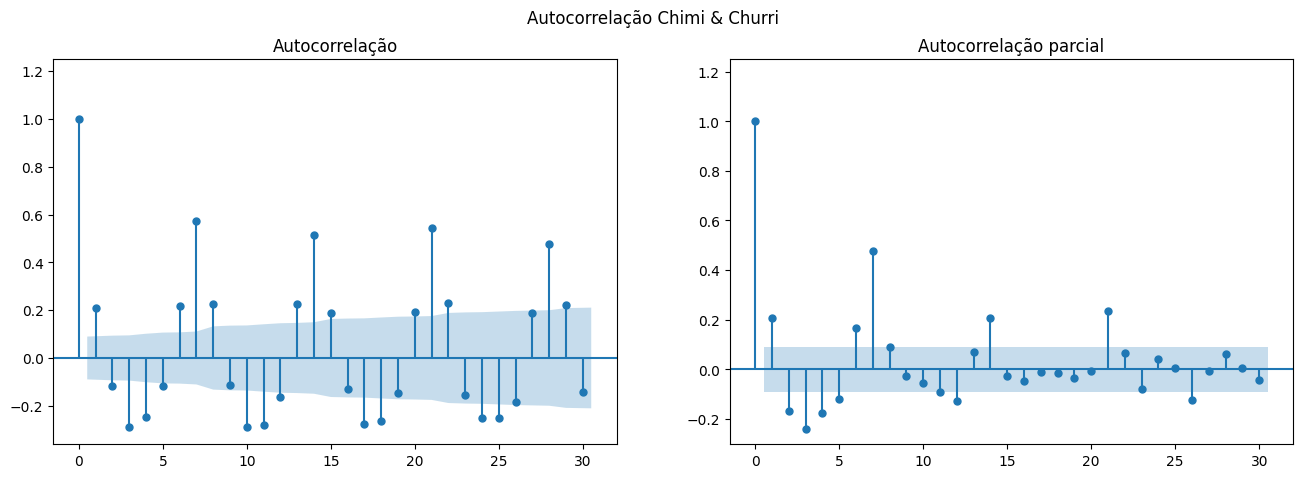

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (16,5))
plot_acf(dados['Chimi & Churri'], lags = 30, title = 'Autocorrelação', auto_ylims = True,  ax = axes[0]) # atrasos de 30 dias
plot_pacf(dados['Chimi & Churri'], lags = 30, title = 'Autocorrelação parcial', auto_ylims = True,  ax = axes[1])
plt.suptitle('Autocorrelação Chimi & Churri')

Text(0.5, 0.98, 'Autocorrelação Assa Frão')

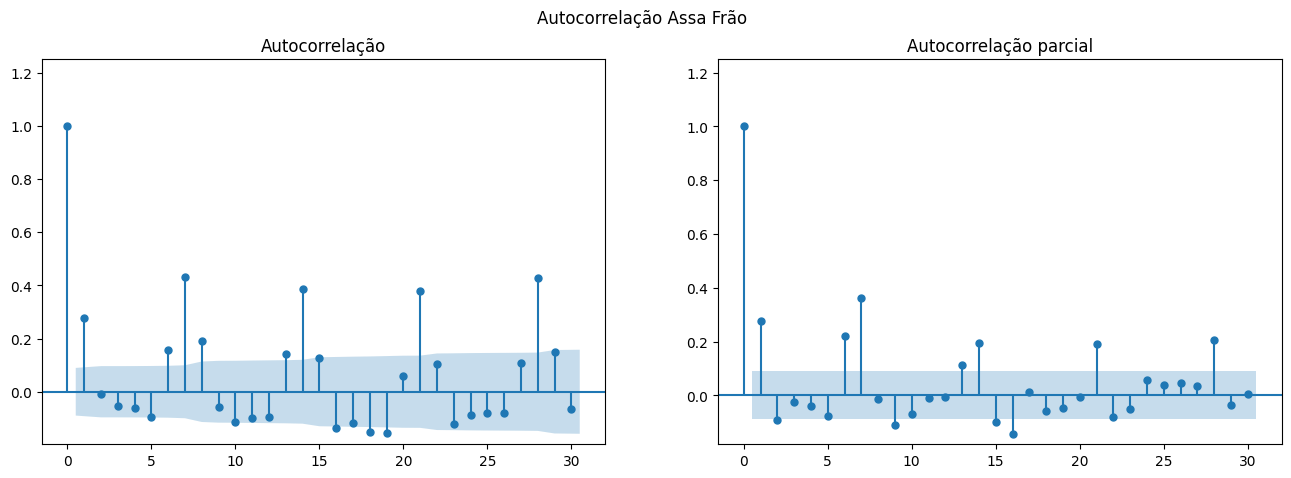

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (16,5))
plot_acf(dados['Assa Frão'], lags = 30, title = 'Autocorrelação', auto_ylims = True,  ax = axes[0]) # atrasos de 30 dias
plot_pacf(dados['Assa Frão'], lags = 30, title = 'Autocorrelação parcial', auto_ylims = True,  ax = axes[1])
plt.suptitle('Autocorrelação Assa Frão')

# Decomposição de uma série temporal

In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
decomposicao_chimi_churri = seasonal_decompose(dados['Chimi & Churri'])

NameError: name 'dados' is not defined

In [ ]:
decomposicao_chimi_churri.trend # trend -> tendencia

,trend
data,
2016-01-01,NaN
2016-01-02,NaN
2016-01-03,NaN
2016-01-04,23.142857
2016-01-05,25.142857
...,...
2017-04-18,42.857143
2017-04-19,46.857143
2017-04-20,NaN


In [ ]:
decomposicao_chimi_churri.seasonal # sanzionalidade

,seasonal
data,
2016-01-01,8.129889
2016-01-02,32.114964
2016-01-03,4.912405
2016-01-04,-11.868229
2016-01-05,-10.796801
...,...
2017-04-18,-10.796801
2017-04-19,-13.214868
2017-04-20,-9.277360


In [ ]:
decomposicao_chimi_churri.resid # resíudos

,resid
data,
2016-01-01,NaN
2016-01-02,NaN
2016-01-03,NaN
2016-01-04,11.725372
2016-01-05,-12.346056
...,...
2017-04-18,-2.060342
2017-04-19,-13.642275
2017-04-20,NaN


# Visualizando a decomposição da série temporal

##Tendência


- Representa o movimento de longo prazo na série
Mostra a direção geral dos dados ao longo do tempo
Pode ser crescente, decrescente ou estável
Ajuda a entender a evolução estrutural da série


##Sazonalidade


- Padrões repetitivos que ocorrem em intervalos fixos
Pode ser diária, semanal, mensal ou anual
Exemplos:

- Vendas de sorvete no verão
Consumo de energia elétrica no inverno
Número de turistas em épocas específicas




**Componente Cíclico**


- Oscilações de longo prazo não associadas a uma periodicidade fixa
Diferente da sazonalidade por não ter período regular
Exemplos:

- Ciclos econômicos
Flutuações no PIB
Ciclos de negócios




##Resíduo (ou Ruído)


- Variações aleatórias que não seguem padrão identificável
Representa componentes imprevisíveis
Pode ser resultado de eventos únicos ou variações estatísticas

**Métodos de Decomposição:**

###Decomposição Aditiva


- Modelo: Série = Tendência + Sazonalidade + Resíduo
Útil quando a magnitude das variações é constante


###Decomposição Multiplicativa


- Modelo: Série = Tendência * Sazonalidade * Resíduo
Adequada quando a magnitude das variações aumenta com o tempo


-----------------------------------------------------------

A decomposição de séries temporais é um método usado para separar uma série temporal em componentes subjacentes para entender melhor suas características. Existem três principais componentes:

1. Tendência (T): representa a direção geral da série ao longo do tempo (crescimento ou declínio).
2. Sazonalidade (S): padrão repetitivo ou cíclico com periodicidade fixa.
3. Ruído ou resíduo (R): componente aleatório ou de erro que não pode ser explicado pelos dois primeiros.


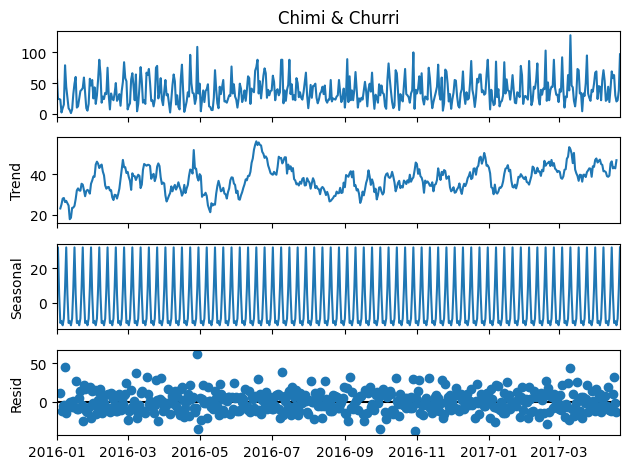

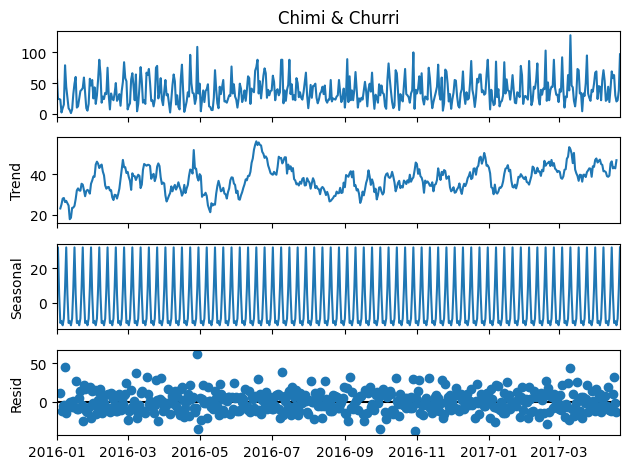

In [ ]:
decomposicao_chimi_churri.plot()

In [ ]:
def plot_decomposicao(decomposicao,title):
  fig, axes = plt.subplots(   ncols = 1, nrows = 4, sharex = True, figsize = (20,8))
  decomposicao.observed.plot( ax = axes[0], title = 'Dados observados')
  decomposicao.trend.plot(    ax = axes[1], title = 'Tendências')
  decomposicao.seasonal.plot( ax = axes[2], title = 'Sazonalidade')
  decomposicao.resid.plot(    ax = axes[3], title = 'Resíudos')
  fig.suptitle(title)
  plt.show()

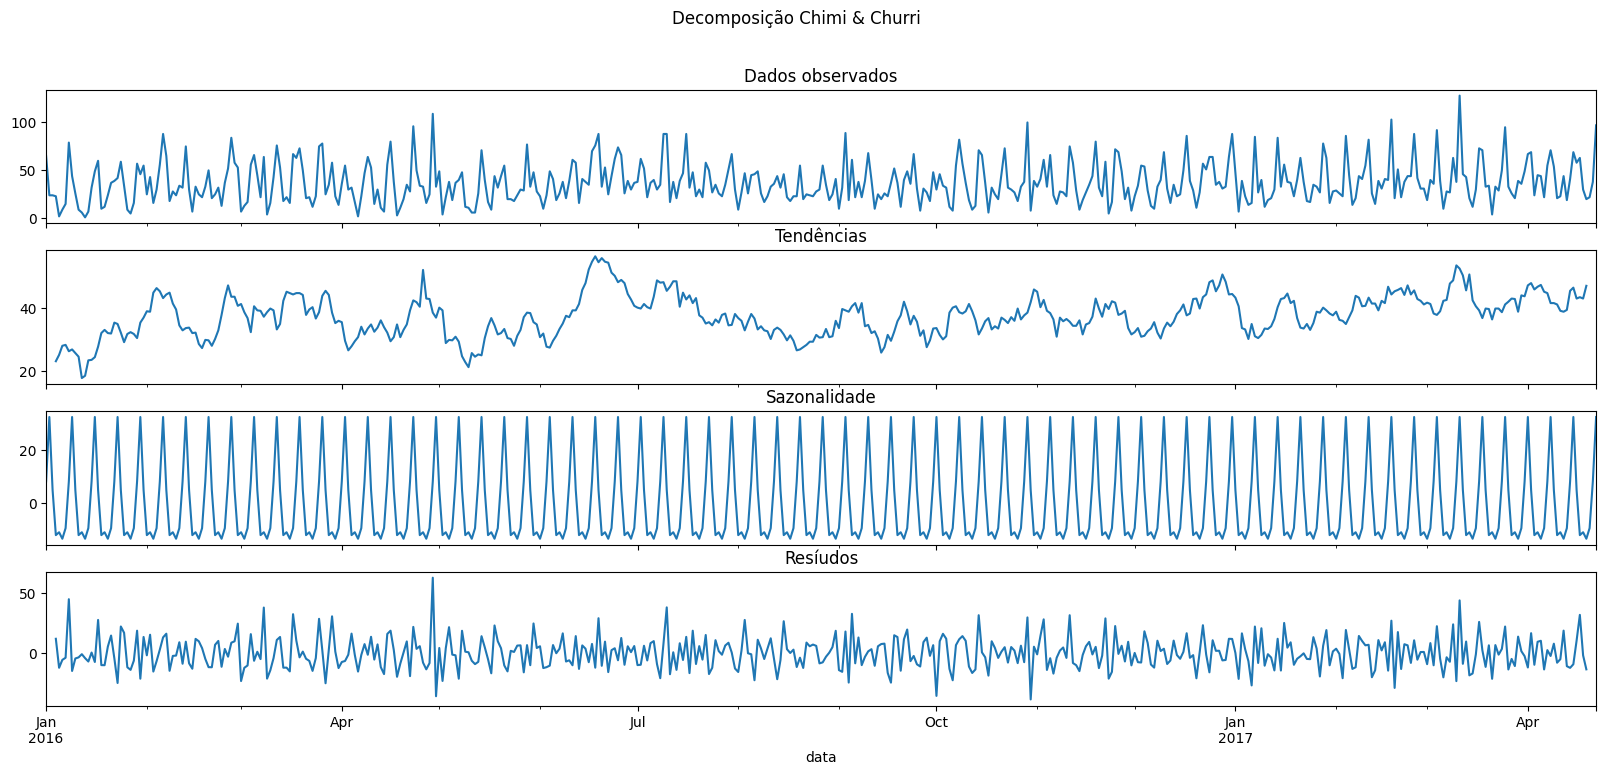

In [ ]:
plot_decomposicao(decomposicao_chimi_churri, 'Decomposição Chimi & Churri')

In [ ]:
decomposicao_assa_frao = seasonal_decompose(dados['Assa Frão'])

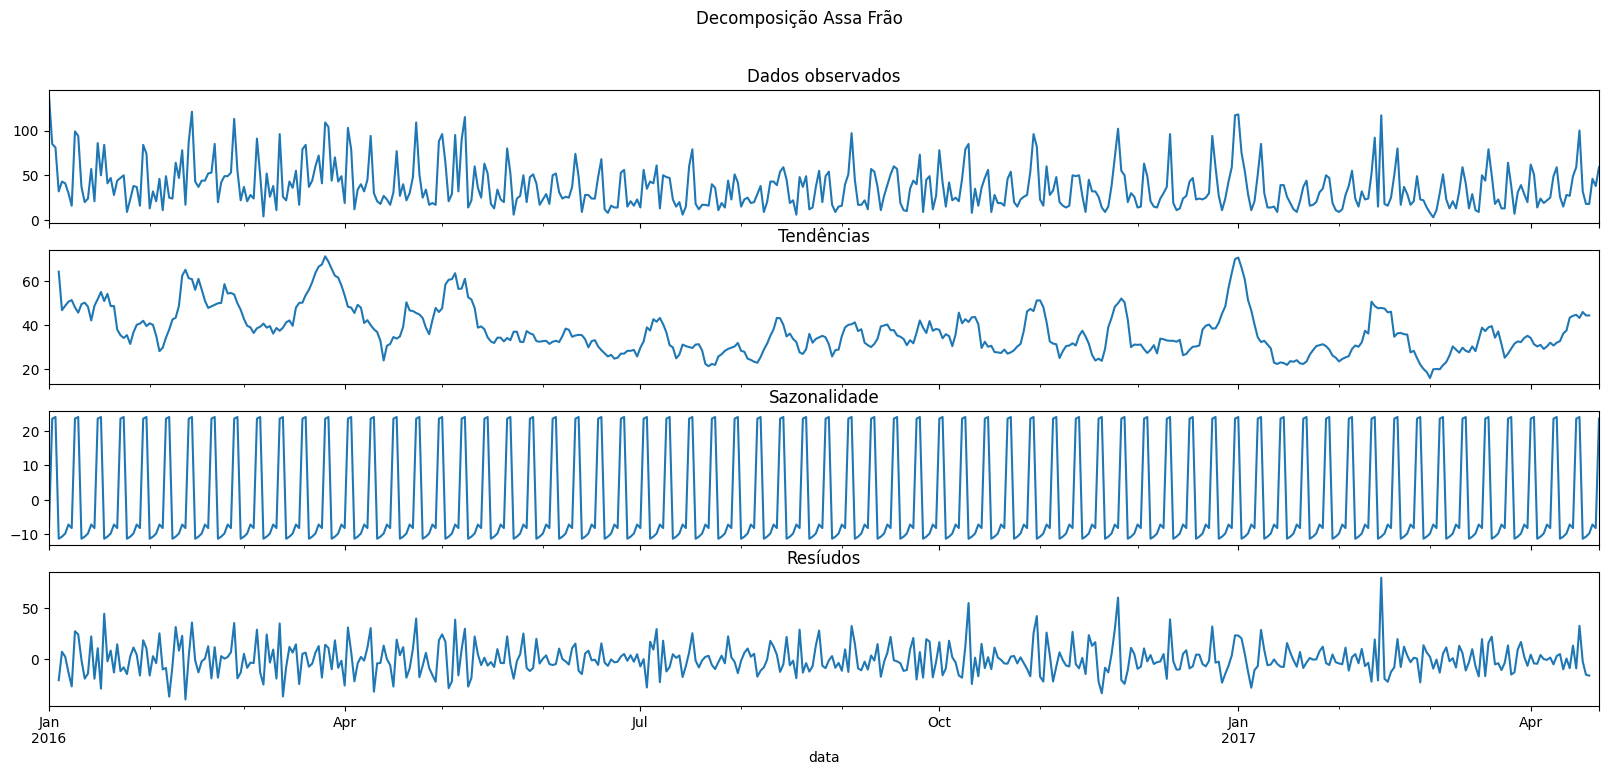

In [ ]:
plot_decomposicao(decomposicao_assa_frao, 'Decomposição Assa Frão')

# Checando anomalias de acordo com resíduos

In [ ]:
# comparando se o resíduo é 2.5 vezes maior que o desvio padrão
# np.where me retorna os indices
anomalias_resid_chimi_churri = np.where(np.abs(decomposicao_chimi_churri.resid) > 2.5 * np.std(decomposicao_chimi_churri.resid))

In [ ]:
anomalias_resid_chimi_churri

,Chimi & Churri,Dia da semana,feriado
data,,,
2016-01-08,79,Sexta,NaN
2016-03-08,64,Terça,NaN
2016-04-29,109,Sexta,NaN
2016-04-30,33,Sábado,NaN
2016-07-10,88,Domingo,NaN
2016-10-01,30,Sábado,NaN
2016-10-30,8,Domingo,NaN
2017-03-11,128,Sábado,NaN


In [ ]:
anomalias_resid_chimi_churri = dados.iloc[anomalias_resid_chimi_churri][['Chimi & Churri', 'Dia da semana', 'feriado']]

In [ ]:
anomalias_resid_chimi_churri

,Chimi & Churri,Dia da semana,feriado
data,,,
2016-01-08,79,Sexta,NaN
2016-03-08,64,Terça,NaN
2016-04-29,109,Sexta,NaN
2016-04-30,33,Sábado,NaN
2016-07-10,88,Domingo,NaN
2016-10-01,30,Sábado,NaN
2016-10-30,8,Domingo,NaN
2017-03-11,128,Sábado,NaN


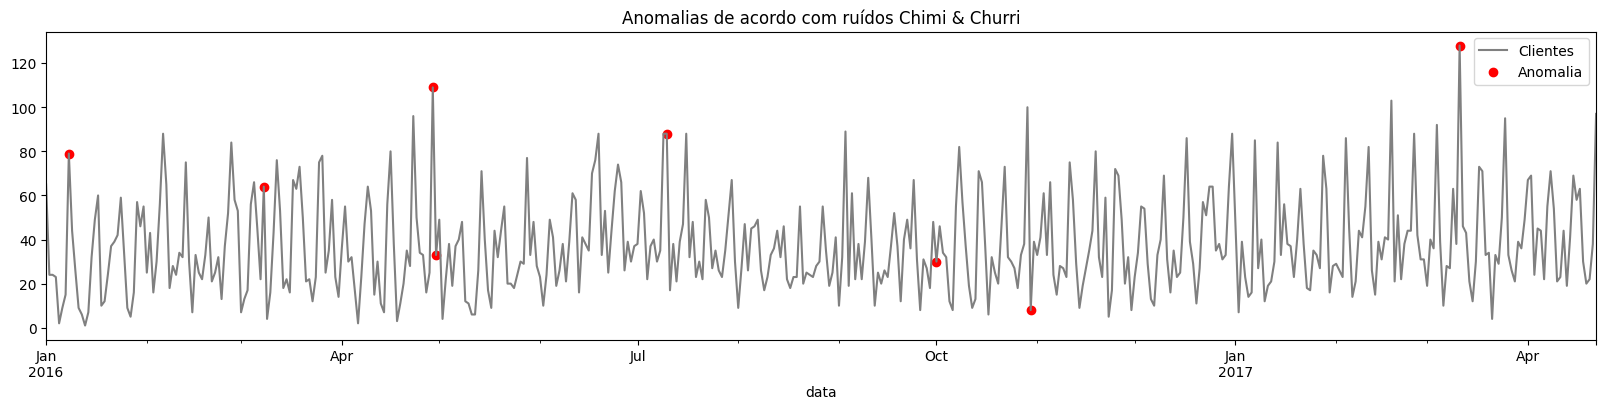

In [ ]:
ax = dados['Chimi & Churri'].plot(label  = 'Clientes', color = 'gray', figsize = (20,4))
ax.scatter(anomalias_resid_chimi_churri.index.to_pydatetime(), anomalias_resid_chimi_churri['Chimi & Churri'], color = 'red', label = 'Anomalia')
ax.set_title('Anomalias de acordo com ruídos Chimi & Churri')
ax.legend();

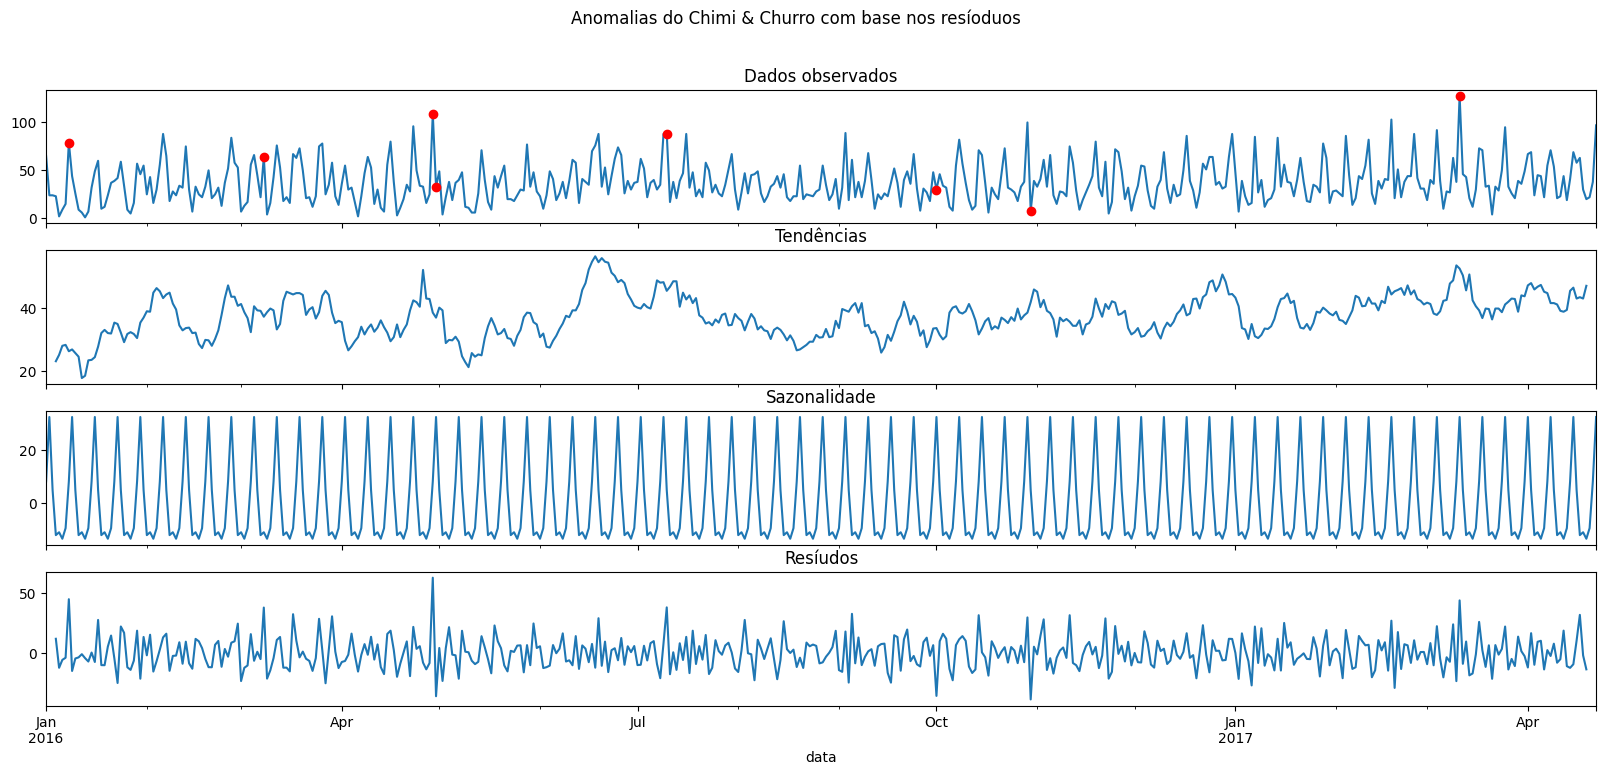

In [ ]:
fig, axes = plt.subplots(   ncols = 1, nrows = 4, sharex = True, figsize = (20,8))
decomposicao_chimi_churri.observed.plot( ax = axes[0], title = 'Dados observados')
axes[0].plot(anomalias_resid_chimi_churri.index, anomalias_resid_chimi_churri['Chimi & Churri'], color = 'red', marker = 'o', linestyle = '',label = 'Anomalias')
decomposicao_chimi_churri.trend.plot(    ax = axes[1], title = 'Tendências')
decomposicao_chimi_churri.seasonal.plot( ax = axes[2], title = 'Sazonalidade')
decomposicao_chimi_churri.resid.plot(    ax = axes[3], title = 'Resíudos')
fig.suptitle('Anomalias do Chimi & Churri com base nos resíoduos')
plt.show()

In [ ]:
anomalias_resid_assa_frao = np.where(np.abs(decomposicao_assa_frao.resid) > 2.5 * np.std(decomposicao_assa_frao.resid))

In [ ]:
anomalias_resid_assa_frao = dados.iloc[anomalias_resid_assa_frao][['Assa Frão', 'Dia da semana', 'feriado']]

In [ ]:
anomalias_resid_assa_frao

,Assa Frão,Dia da semana,feriado
data,,,
2016-01-18,84,Segunda,NaN
2016-02-12,17,Sexta,NaN
2016-04-23,109,Sábado,NaN
2016-05-05,95,Quinta,NaN
2016-10-10,85,Segunda,NaN
2016-10-31,82,Segunda,Halloween
2016-11-25,102,Sexta,Black Friday
2016-12-11,96,Domingo,NaN
2017-02-14,117,Terça,Dia dos namorados


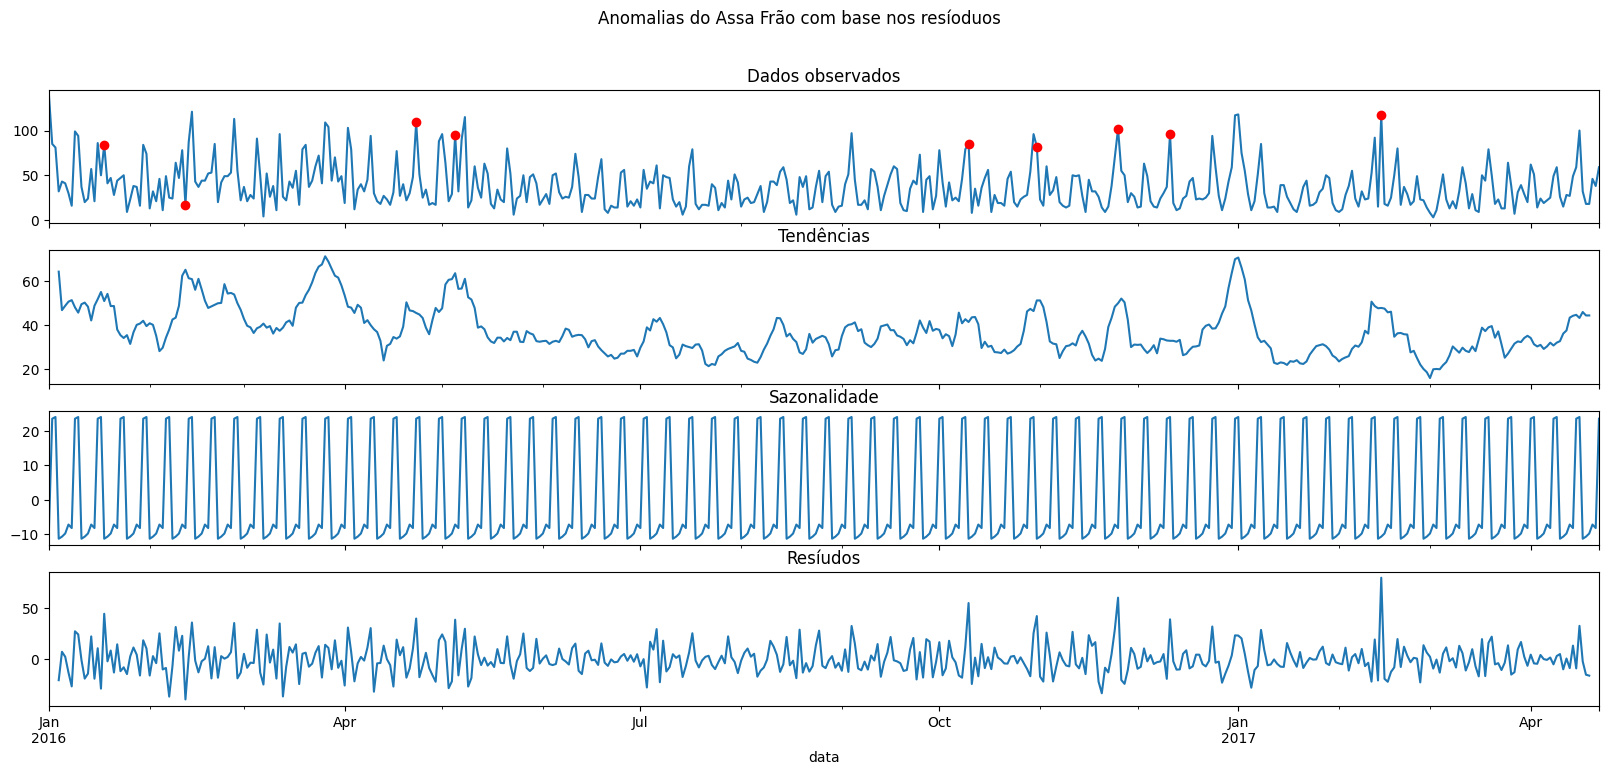

In [ ]:
fig, axes = plt.subplots(   ncols = 1, nrows = 4, sharex = True, figsize = (20,8))
decomposicao_assa_frao.observed.plot( ax = axes[0], title = 'Dados observados')
axes[0].plot(anomalias_resid_assa_frao.index, anomalias_resid_assa_frao['Assa Frão'], color = 'red', marker = 'o', linestyle = '',label = 'Anomalias')
decomposicao_assa_frao.trend.plot(    ax = axes[1], title = 'Tendências')
decomposicao_assa_frao.seasonal.plot( ax = axes[2], title = 'Sazonalidade')
decomposicao_assa_frao.resid.plot(    ax = axes[3], title = 'Resíudos')
fig.suptitle('Anomalias do Assa Frão com base nos resíoduos')
plt.show()

# Fazendo previsões de Séries Temporais


## Prevendo novos valores

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

A reamostragem é o processo de alterar a frequência de uma série temporal. Isso envolve a agregação de dados em uma frequência mais baixa, por exemplo transformar dados diários em mensais, ou a interpolação de dados para uma frequência mais alta, por exemplo transformar dados mensais em diários.

Para alterar a frequência desses dados, precisamos fornecer a informação de qual o período desejamos realizar a alteração a partir do parâmetro rule do método resample. Os principais períodos que podemos utilizar a partir da biblioteca Pandas são os seguintes:

    D: diário
    B: dias úteis
    h: horas
    min: minutos
    s: segundos
    W: semanal
    M: mensal
    Q: trimestral
    Y: anual

In [ ]:
modelo_chimi_churri = ExponentialSmoothing(dados['Chimi & Churri'], seasonal='additive', seasonal_periods = 7, freq = 'D')
resultado_chimi_churri = modelo_chimi_churri.fit()
previsao_chimi_churri  = resultado_chimi_churri.forecast(steps = 14)

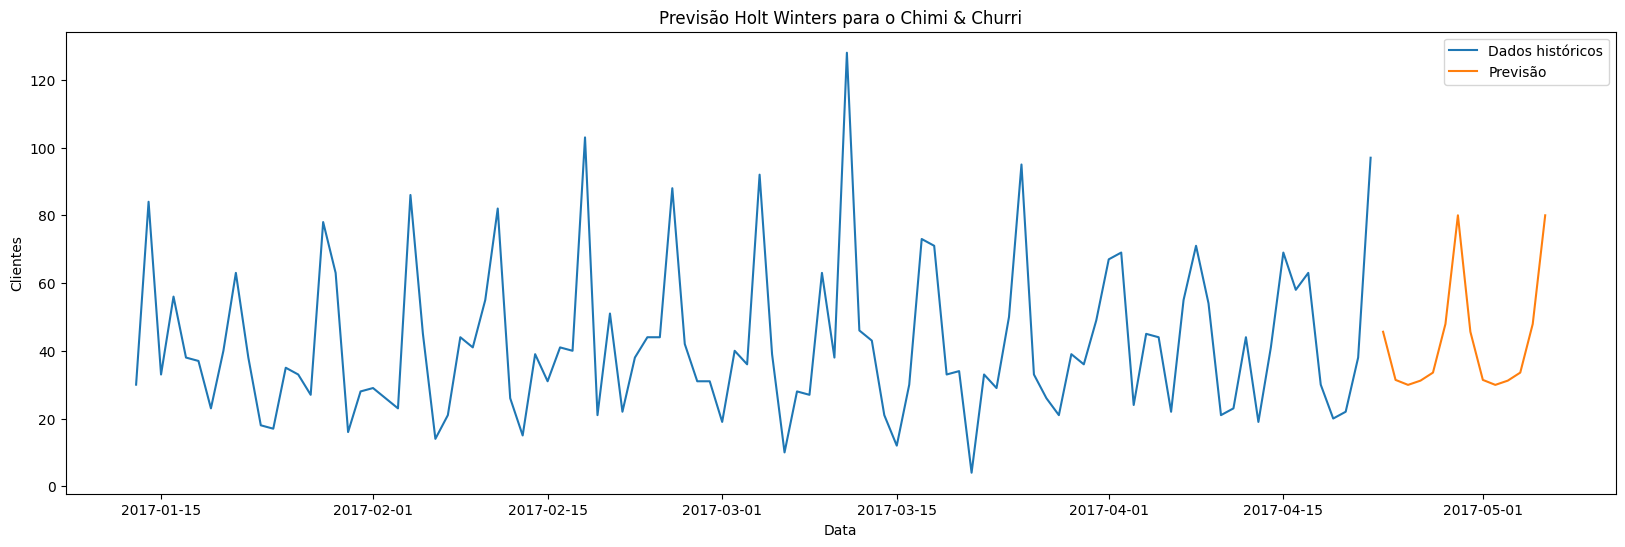

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(dados['Chimi & Churri'].index[-100:], dados['Chimi & Churri'].values[-100:], label = 'Dados históricos')
plt.plot(previsao_chimi_churri.index, previsao_chimi_churri.values, label = 'Previsão')
plt.title('Previsão Holt Winters para o Chimi & Churri')
plt.xlabel('Data')
plt.ylabel('Clientes')
plt.legend();

In [ ]:
modelo_assa_frao = ExponentialSmoothing(dados['Assa Frão'], seasonal='additive', seasonal_periods = 7, freq = 'D')
resultado_assa_frao = modelo_assa_frao.fit()
previsao_assa_frao  = resultado_assa_frao.forecast(steps = 14)

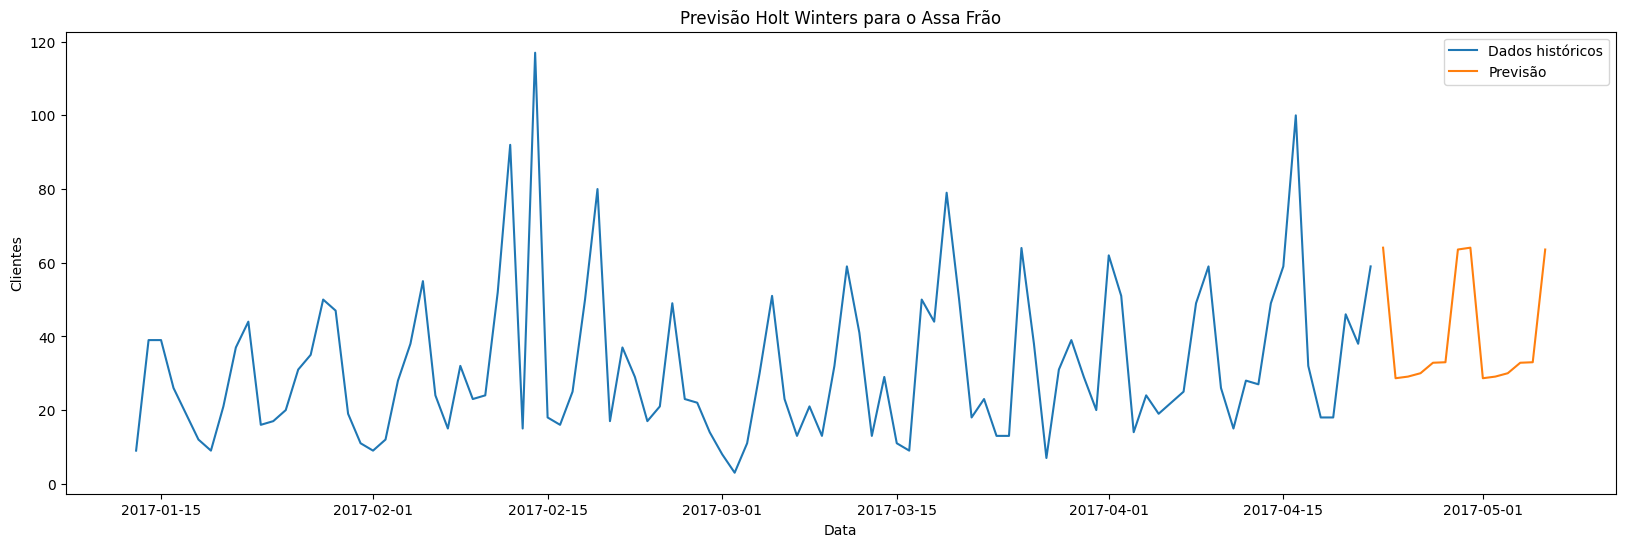

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(dados['Assa Frão'].index[-100:], dados['Assa Frão'].values[-100:], label = 'Dados históricos')
plt.plot(previsao_assa_frao.index, previsao_assa_frao.values, label = 'Previsão')
plt.title('Previsão Holt Winters para o Assa Frão')
plt.xlabel('Data')
plt.ylabel('Clientes')
plt.legend();

# Sumarizando as previsões

In [ ]:
tabela_previsao = pd.DataFrame()
tabela_previsao.index = previsao_chimi_churri.index
tabela_previsao['Previsão Chimi & Churri'] = previsao_chimi_churri.values
tabela_previsao['Previsão Assa Frão'] = previsao_assa_frao.values
tabela_previsao

,Previsão Chimi & Churri,Previsão Assa Frão
2017-04-23,45.615042,64.083659
2017-04-24,31.404129,28.646837
2017-04-25,29.933185,29.092343
2017-04-26,31.187987,30.008440
2017-04-27,33.558200,32.851045
2017-04-28,47.912801,32.986936
2017-04-29,80.001121,63.585406
2017-04-30,45.615042,64.083659
2017-05-01,31.404129,28.646837
2017-05-02,29.933185,29.092343


In [ ]:
tabela_previsao = tabela_previsao.astype(int)

In [ ]:
tabela_previsao

,Previsão Chimi & Churri,Previsão Assa Frão
2017-04-23,45,64
2017-04-24,31,28
2017-04-25,29,29
2017-04-26,31,30
2017-04-27,33,32
2017-04-28,47,32
2017-04-29,80,63
2017-04-30,45,64
2017-05-01,31,28
2017-05-02,29,29


In [ ]:
# salvando no formato excel
# tabela_previsao.to_excel('Tabela previsão para os próximos 14 dias.xlsx')

A principal diferença desse modelo para uma simples decomposição de componentes é a de que o modelo tem o intuito de utilizar os componentes para realizar previsões de valores futuros. Vamos entender cada um dos componentes e como eles são combinados para fazer previsões precisas.
Componentes do Modelo

    Nível (L): Representa o valor médio da série no momento atual.
    Tendência (T): Reflete a direção e a inclinação da série ao longo do tempo.
    Sazonalidade (S): Captura os padrões repetitivos que ocorrem em intervalos regulares.

Assim como a decomposição de componentes simples, o modelo Holt-Winters tem duas variantes, a aditiva e a multiplicativa. O modelo aditivo é utilizado quando a amplitude da sazonalidade é constante ao longo do tempo, enquanto o modelo multiplicativo é utilizado quando a amplitude da sazonalidade varia com o nível da série.
Modelo aditivo

No modelo aditivo, a série temporal é expressa como a soma dos componentes, conforme a fórmula:

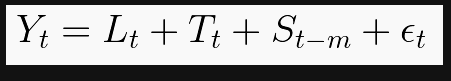



Uma das etapas mais interessantes na análise de séries temporais é a previsão de valores futuros usando modelos de machine learning. O modelo de previsão Holt-Winters é uma técnica estatística amplamente utilizada para prever séries temporais, especialmente aquelas que exibem padrões sazonais. Esse modelo se baseia na decomposição da série em três componentes principais: nível, tendência e sazonalidade, restando um componente de resíduo não explicado pela série que seria o erro da previsão.

Onde:

    Y(t) é o valor observado no tempo t;
    L(t) é o nível no tempo t;
    T(t) é a tendência no tempo t;
    S(t-m) é o componente sazonal no tempo t para o período sazonal m;
    ε(t) é o erro aleatório no tempo t.

Cada componente é definido com base nas seguintes equações:


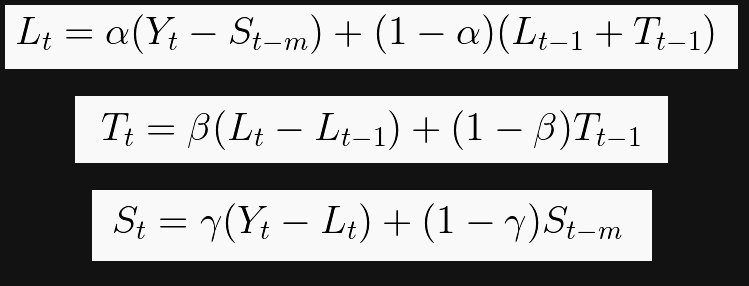




Onde α, β e γ são parâmetros de suavização entre 0 e 1.



#Modelo multiplicativo

No modelo multiplicativo, a série temporal é expressa como a multiplicação da sazonalidade pela soma da tendência com o nível, conforme a fórmula:



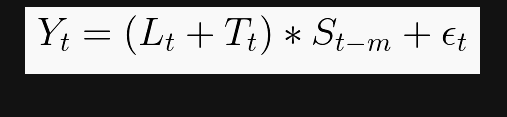




Onde:

    Y(t) é o valor observado no tempo t;
    L(t) é o nível no tempo t;
    T(t) é a tendência no tempo t;
    S(t-m) é o componente sazonal no tempo t para o período sazonal m;
    ε(t) é o erro aleatório no tempo t.



Cada componente é definido com base nas seguintes equações:


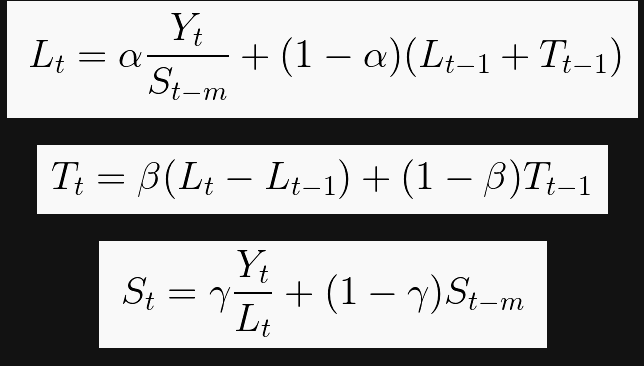




Onde α, β e γ são parâmetros de suavização entre 0 e 1.

O ajuste do modelo de Holt Winters em uma série temporal é feita a partir de procedimentos iterativos para estimar os valores iniciais de L,T e S e os parâmetros α, β e γ. Depois de definir todos os parâmetros, as estimativas são usadas para realizar previsões futuras. Esse modelo é bastante utilizado em áreas como previsão de demanda de produtos, planejamento financeiro, gestão de estoques e análise de dados meteorológicos.




 [1. Séries temporais - Funcionalidades, documentação oficial da biblioteca Pandas (gratuito, inglês, texto)](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)

- A documentação de séries temporais da biblioteca pandas é essencial para dominar manipulações e transformações com dados temporais. Aborda diversos métodos e exemplos que podem ser aplicados em informações de data.


[2. Análise de séries temporais, documentação oficial do statsmodels (gratuito, inglês, texto)](https://www.statsmodels.org/dev/tsa.html)

- A documentação de análise de séries temporais da biblioteca statsmodels apresenta diversos modelos, testes e análises estatísticas que podem ser aplicadas em dados de séries temporais. Explicações e exemplos de utilização de modelos de previsão podem ser encontrados na documentação.

[3. Blog neptune (gratuito, inglês, texto)](https://neptune.ai/blog/anomaly-detection-in-time-series)

- Este blog da ferramenta neptune.ai aborda o que são dados discrepantes e como podem ser detectados em séries temporais, contendo exemplos e explicações a respeito do assunto, incluindo códigos e imagens gráficas.

[4. Livro séries temporais (pago, português, texto)](https://www.casadocodigo.com.br/products/livro-series-temporais-prophet)

- Este livro de séries temporais aborda desde os conceitos preliminares de séries temporais até utilização de modelos de previsão usando a biblioteca Prophet. Dentre os assuntos tratados estão a validação e avaliação de performance de modelos, otimização de hiperparâmetros e visualização interativa dos resultados usando gráficos.


[5. Executando experimentos com Séries Temporais - Nubank (gratuito, português, vídeo)](https://www.youtube.com/watch?v=EnHXIiMRpVE)

- Este vídeo explora os conceitos de séries temporais para aplicação e entendimento do efeito de campanhas de marketing. Explora conceitos como autocorrelação, processos estacionários, modelos autorregressivos e de médias móveis, e como esses conceitos podem ser aplicados em séries temporais interrompidas.

